In [1]:
# necessary packages for training deep learning algorithms 
import numpy as np
import pandas as pd
import cv2
from sklearn.utils import shuffle # Shuffle arrays or sparse matrices in a consistent way
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import scikitplot as skplt
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_dir = 'F:\\Ml files\\brain tumor classification\\Data\\Training\\'

test_dir = 'F:\\Ml files\\brain tumor classification\\Data\\Testing\\'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+label):
        train_paths.append(train_dir+label+'/'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

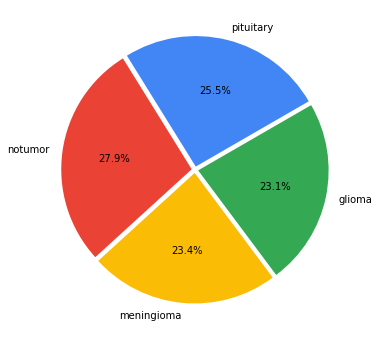

In [3]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

plt.pie([len([x for x in train_labels if x=='pituitary']),
         len([x for x in train_labels if x=='notumor']),
         len([x for x in train_labels if x=='meningioma']),
         len([x for x in train_labels if x=='glioma'])],
        labels=['pituitary','notumor', 'meningioma', 'glioma'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);

In [4]:
X_train = [] #Training image
Y_train = [] #Training Labels
X_test =[]
Y_test = []

# define the labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# resize the images
image_size=150

# load the training data into X_train and y_train
for i in labels:
    folderPath = os.path.join('F:\\Ml files\\brain tumor classification\\Data\\', 'Training', i)
    for j in tqdm(os.listdir(folderPath)):
#         read the images into an array
        image = cv2.imread(os.path.join(folderPath, j))
#     resize the image into (150,150)
        image = cv2.resize(image, (image_size, image_size))
#     added the image into X_train
        X_train.append(image)
    #     added the label into Y_train
        Y_train.append(i)
        

# load the training data into X_train and y_train
for i in labels:
    folderPath = os.path.join('F:\\Ml files\\brain tumor classification\\Data\\', 'Testing', i) # Join two or more pathname components
    for j in tqdm(os.listdir(folderPath)):
        image = cv2.imread(os.path.join(folderPath, j))
        image = cv2.resize(image, (image_size, image_size))
        X_test.append(image)
        Y_test.append(i)
        
#Image and Label is appended as list, now is to be converted into numpy array
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

100%|██████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 1053.68it/s]


In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5712, 150, 150, 3)
(5712,)
(1311, 150, 150, 3)
(1311,)


In [6]:
# Normalization
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
# Shuffling data
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)
X_test, Y_test = shuffle(X_test, Y_test, random_state=42)

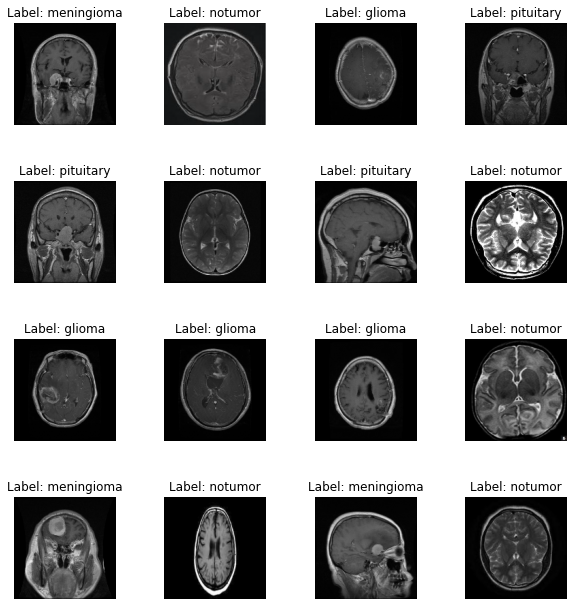

In [8]:
grid_width = 4
grid_height = 4
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(8, 8)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        ax[i][j].axis('off')
        ax[i][j].set_title('Label: '+Y_train[img_idx])
        ax[i][j].imshow(X_train[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.55)  

In [9]:
nsamples, nx, ny, nrgb = X_train.shape
x_train2 = X_train.reshape((nsamples,nx*ny*nrgb))

In [10]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny*nrgb))

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier()
RF_model.fit(x_train2,Y_train)
RF_y_pred=RF_model.predict(x_test2)
print(classification_report(RF_y_pred,Y_test))

              precision    recall  f1-score   support

      glioma       0.84      0.95      0.89       264
  meningioma       0.91      0.85      0.88       330
     notumor       1.00      0.98      0.99       415
   pituitary       0.97      0.96      0.97       302

    accuracy                           0.94      1311
   macro avg       0.93      0.93      0.93      1311
weighted avg       0.94      0.94      0.94      1311



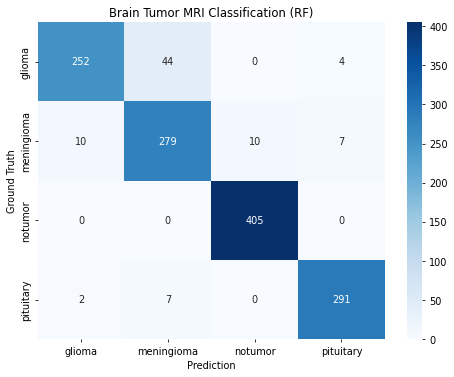

In [12]:
cnf = confusion_matrix(Y_test, RF_y_pred)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('Brain Tumor MRI Classification (RF)')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model.fit(x_train2,Y_train)
LR_y_pred=LR_model.predict(x_test2)
print(classification_report(LR_y_pred,Y_test))

              precision    recall  f1-score   support

      glioma       0.74      0.81      0.77       275
  meningioma       0.78      0.75      0.77       321
     notumor       0.98      0.95      0.97       417
   pituitary       0.93      0.94      0.94       298

    accuracy                           0.87      1311
   macro avg       0.86      0.86      0.86      1311
weighted avg       0.87      0.87      0.87      1311



C:\Users\Ovi\anaconda3\envs\tensrgpu\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


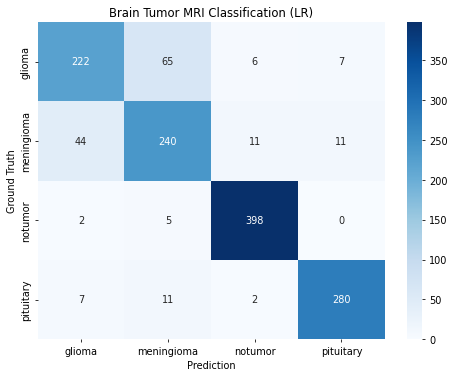

In [14]:
cnf = confusion_matrix(Y_test, LR_y_pred)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('Brain Tumor MRI Classification (LR)')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

# SVM

In [15]:
from sklearn import svm
SVM_model=svm.SVC()
SVM_model.fit(x_train2,Y_train)
SVM_y_pred=SVM_model.predict(x_test2)
print(classification_report(SVM_y_pred,Y_test))

              precision    recall  f1-score   support

      glioma       0.83      0.85      0.84       292
  meningioma       0.76      0.82      0.79       284
     notumor       0.97      0.94      0.95       416
   pituitary       0.97      0.92      0.94       319

    accuracy                           0.89      1311
   macro avg       0.88      0.88      0.88      1311
weighted avg       0.89      0.89      0.89      1311



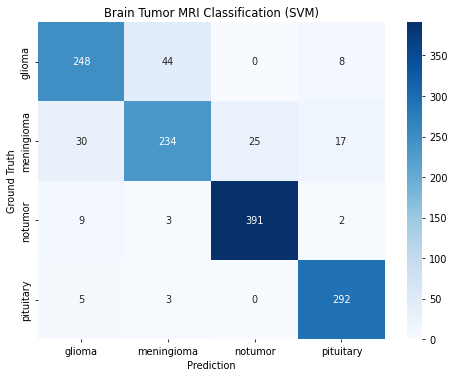

In [16]:
cnf = confusion_matrix(Y_test, SVM_y_pred)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('Brain Tumor MRI Classification (SVM)')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model= KNeighborsClassifier()
KNN_model.fit(x_train2,Y_train)
KNN_y_pred=KNN_model.predict(x_test2)
print(classification_report(KNN_y_pred,Y_test))

              precision    recall  f1-score   support

      glioma       0.93      0.77      0.84       363
  meningioma       0.54      0.90      0.67       182
     notumor       0.94      0.87      0.90       439
   pituitary       0.99      0.91      0.94       327

    accuracy                           0.85      1311
   macro avg       0.85      0.86      0.84      1311
weighted avg       0.89      0.85      0.86      1311



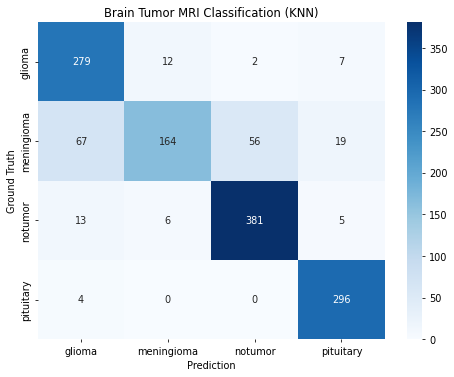

In [23]:
cnf = confusion_matrix(Y_test, KNN_y_pred)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('Brain Tumor MRI Classification (KNN)')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)